In [1]:
import numpy as np         
import pandas as pd
import matplotlib.pyplot as plt      
import random

from keras.datasets import mnist     
from keras.models import Sequential  

from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

2025-03-05 22:01:27.618327: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-05 22:01:27.626950: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741192287.637323    7733 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741192287.640380    7733 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-05 22:01:27.651468: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [3]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

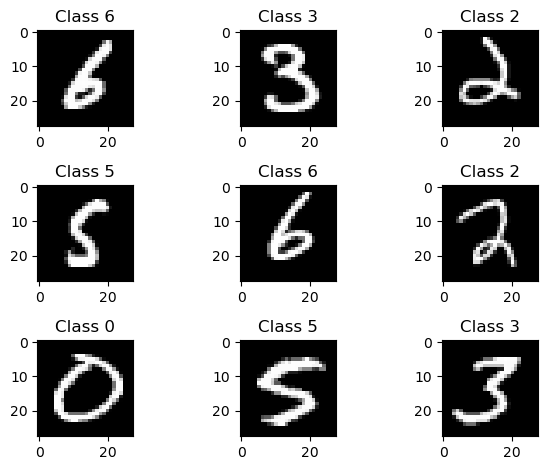

In [4]:
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [5]:
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28)
Testing matrix shape (10000, 28, 28)


In [6]:
no_classes = 10

Y_train = to_categorical(y_train, no_classes)
Y_test = to_categorical(y_test, no_classes)

### Model Summary

This model is a Convolutional Neural Network (CNN) with two convolutional layers followed by dense fully connected layers.

#### 1. **Input Layer**
- **Layer Type**: Input
- **Shape**: (28, 28, 1)
- **Description**: The input is an image of size 28x28 pixels with 1 color channel (grayscale).

#### 2. **Convolutional Layer 1**
- **Layer Type**: Conv2D
- **Number of Filters**: 32
- **Kernel Size**: (3, 3)
- **Activation**: ReLU
- **Shape after this layer**: (26, 26, 32)
- **Description**: Applies 32 convolutional filters to the input image, resulting in 32 feature maps of size 26x26.

#### 3. **Max Pooling Layer 1**
- **Layer Type**: MaxPooling2D
- **Pool Size**: (2, 2)
- **Shape after this layer**: (13, 13, 32)
- **Description**: Reduces the spatial dimensions of the feature maps by taking the maximum value in 2x2 blocks, resulting in feature maps of size 13x13.

#### 4. **Convolutional Layer 2**
- **Layer Type**: Conv2D
- **Number of Filters**: 64
- **Kernel Size**: (3, 3)
- **Activation**: ReLU
- **Shape after this layer**: (11, 11, 64)
- **Description**: Applies 64 convolutional filters to the output of the previous pooling layer, producing 64 feature maps of size 11x11.

#### 5. **Max Pooling Layer 2**
- **Layer Type**: MaxPooling2D
- **Pool Size**: (2, 2)
- **Shape after this layer**: (5, 5, 64)
- **Description**: Again reduces the size of the feature maps by 2x2, resulting in feature maps of size 5x5.

#### 6. **Flatten Layer**
- **Layer Type**: Flatten
- **Shape after this layer**: (1600)
- **Description**: Flattens the 5x5x64 feature maps into a 1D vector of length 1600 to be fed into the fully connected layers.

#### 7. **Fully Connected Layer 1**
- **Layer Type**: Dense
- **Number of Units**: 128
- **Activation**: ReLU
- **Description**: A fully connected layer with 128 neurons, activated by ReLU.

#### 8. **Dropout Layer 1**
- **Layer Type**: Dropout
- **Rate**: 0.2
- **Description**: Randomly sets 20% of the input units to zero during training to prevent overfitting.

#### 9. **Fully Connected Layer 2**
- **Layer Type**: Dense
- **Number of Units**: 64
- **Activation**: ReLU
- **Description**: A fully connected layer with 64 neurons, activated by ReLU.

#### 10. **Dropout Layer 2**
- **Layer Type**: Dropout
- **Rate**: 0.2
- **Description**: Randomly sets 20% of the input units to zero during training to prevent overfitting.

#### 11. **Output Layer**
- **Layer Type**: Dense
- **Number of Units**: 10
- **Activation**: Softmax
- **Description**: The output layer with 10 neurons (one for each class from 0 to 9). The softmax activation function outputs a probability distribution across the 10 classes.

---

In [7]:
model = Sequential()

# Add Convolutional Layer 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Convolutional Layer 2
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2)) 

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(10, activation='softmax'))

# Summarize the model
model.summary()

/home/nimisha/anaconda3/envs/tf/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1741192289.513863    7733 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2281 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# Reshape data to match the input shape for CNN (28x28x1)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Normalize the data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [10]:
# Train the model
history = model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10


I0000 00:00:1741192291.045532    7801 service.cc:148] XLA service 0x7b757401dc00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741192291.045562    7801 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-03-05 22:01:31.065998: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741192291.168269    7801 cuda_dnn.cc:529] Loaded cuDNN version 90300


 43/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3815 - loss: 1.8483

I0000 00:00:1741192292.955742    7801 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7872 - loss: 0.6558
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9738 - loss: 0.0859
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9831 - loss: 0.0560
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9870 - loss: 0.0418
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9898 - loss: 0.0342
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9903 - loss: 0.0305
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9929 - loss: 0.0242
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9937 - loss: 0.0212
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9950 - loss: 0.0171
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9945 - loss: 0.0176


In [11]:
model.save('mnist_cnn_model.keras')

In [12]:
from tensorflow.keras.models import load_model

model = load_model('mnist_cnn_model.keras')

In [13]:
# Evaluate the model
score = model.evaluate(X_train, Y_train)
print('Test accuracy:', score[1])

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9981 - loss: 0.0066  
Test accuracy: 0.9980499744415283


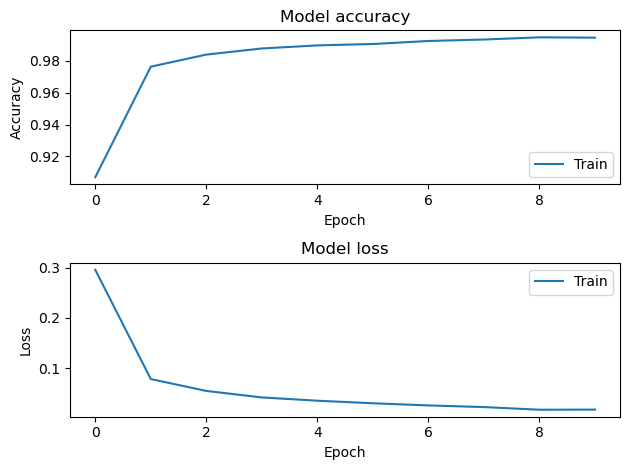

In [14]:
# Plot the training history (accuracy and loss)
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

plt.tight_layout()

In [15]:
# Get the model's predictions (probabilities for each class)
predictions = model.predict(X_test)

# Get the class with the highest probability for each sample
predicted_classes = np.argmax(predictions, axis=1)

# Get the indices where predictions are correct
correct_indices = np.nonzero(predicted_classes == y_test)[0]

# Get the indices where predictions are incorrect
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step    


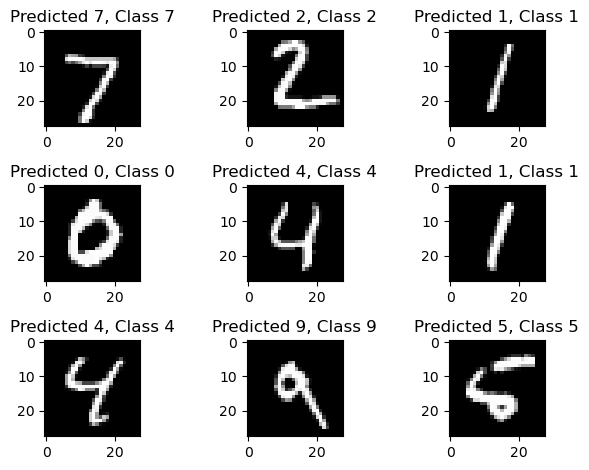

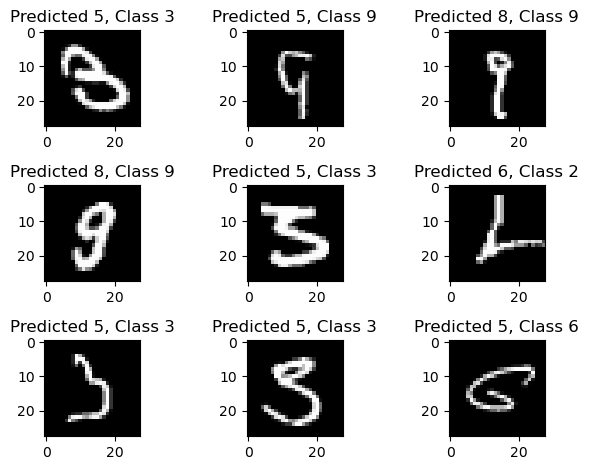

In [16]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()

In [17]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, predicted_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       1.00      1.00      1.00       982
           5       0.98      1.00      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



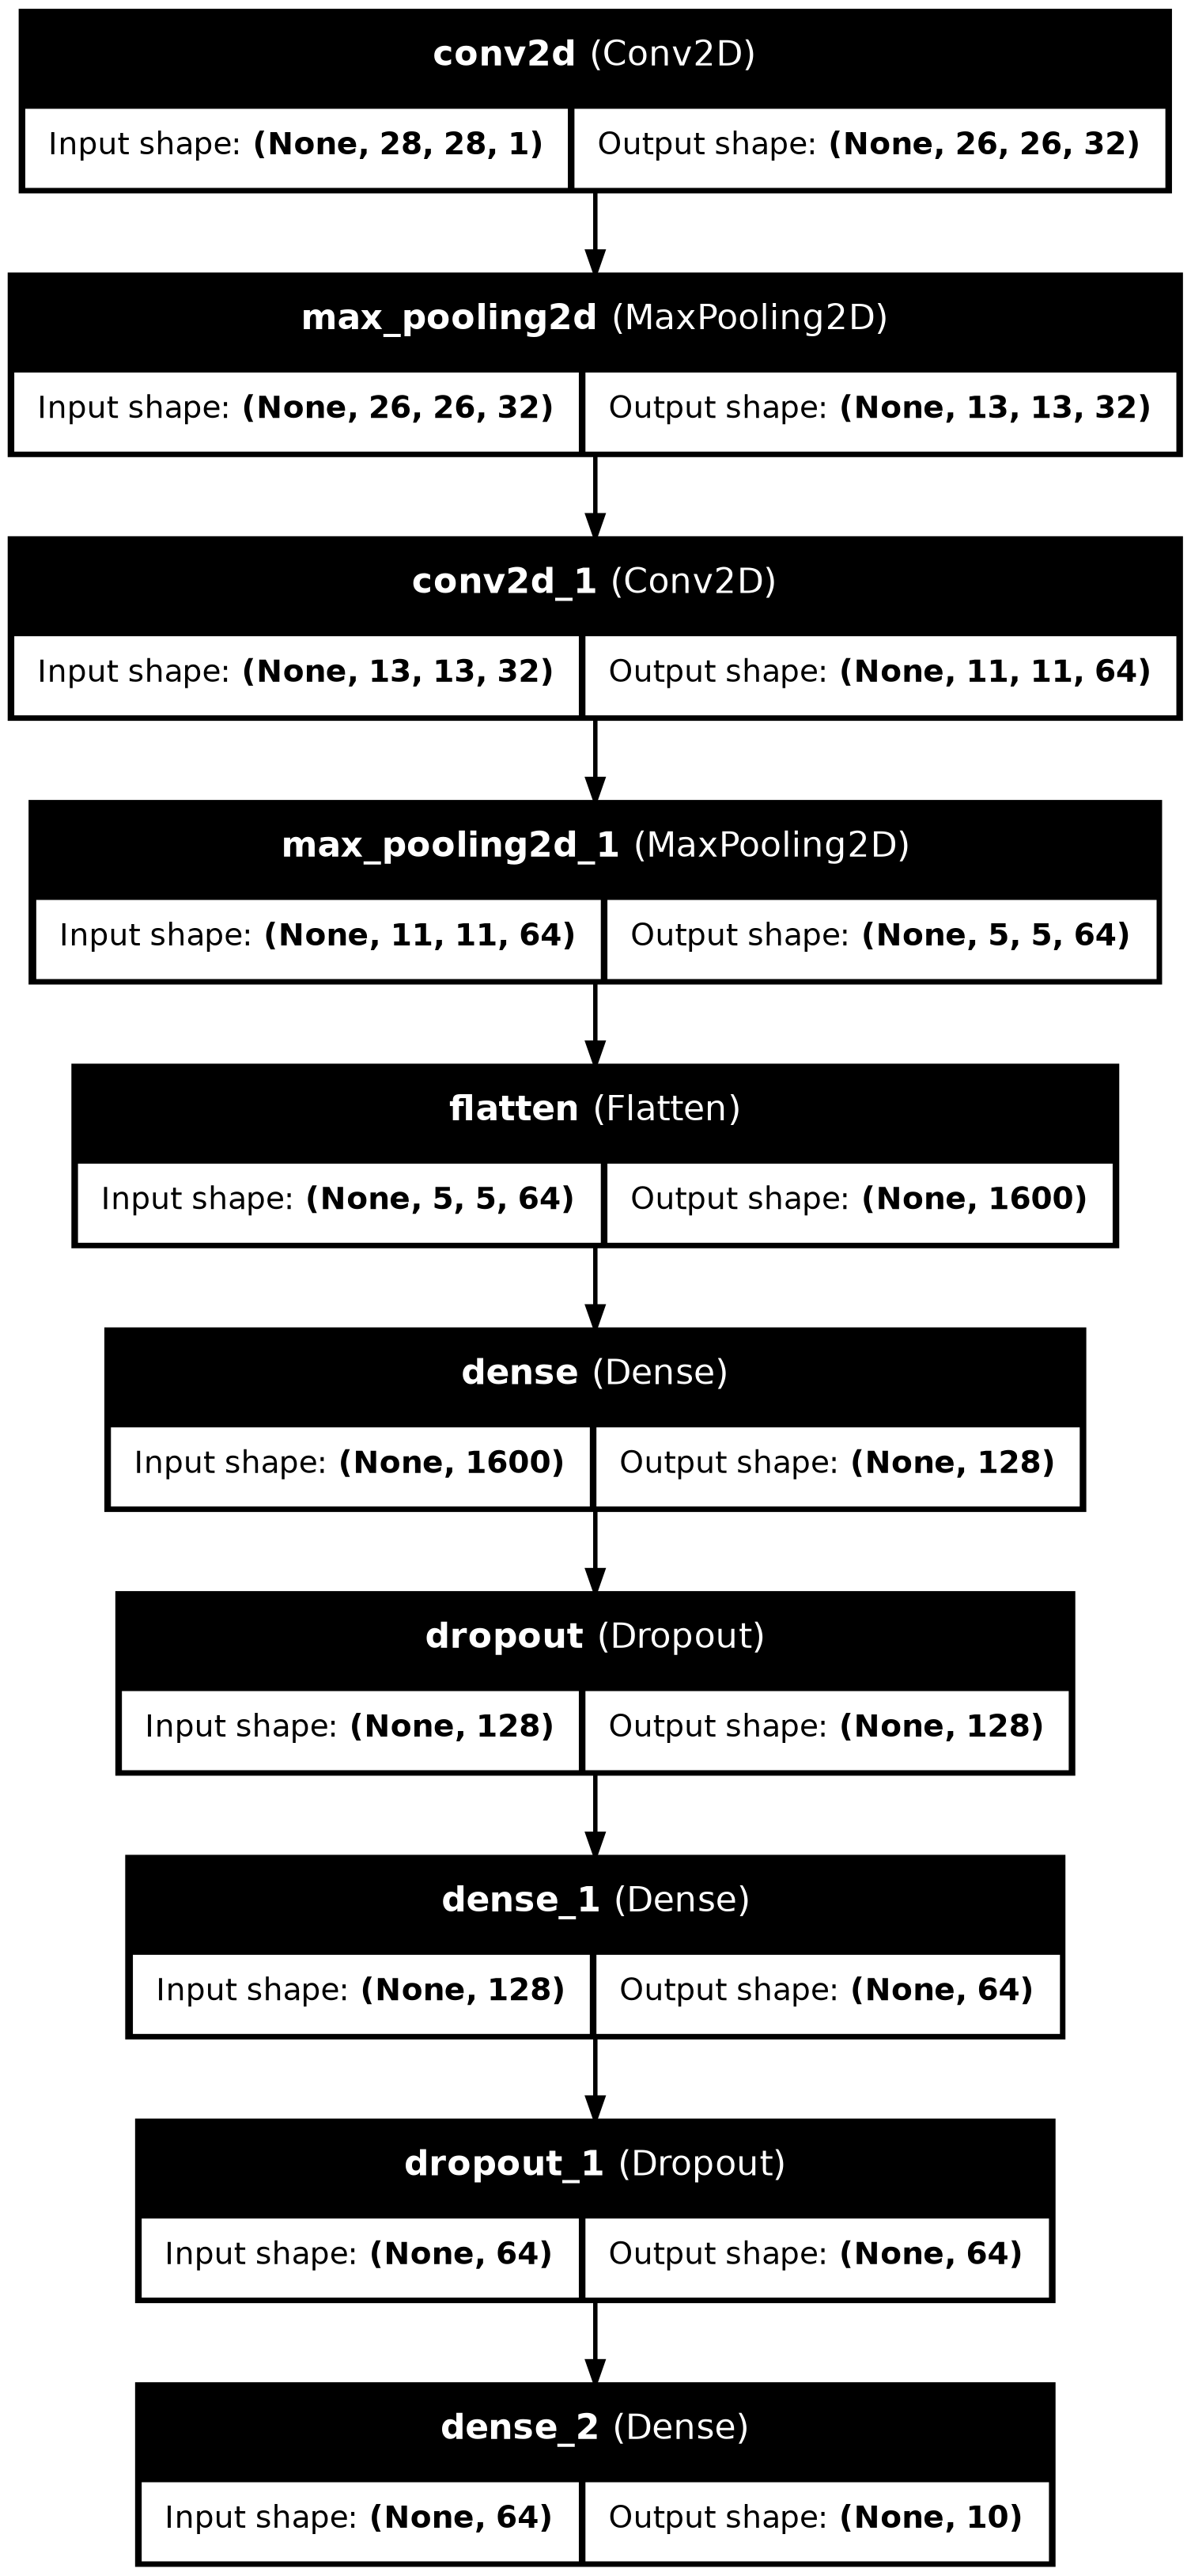

In [18]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='cnn_architecture.png', show_shapes=True, show_layer_names=True)